<h1 align=center>Best Investment Solution Using Clustering and FoursquareAPI</h1>

# Bussiness statement

### Problem Statement
<p>A global investment company that invest in Food and Beverages industry, wants to start looking for business in Europe. When they start to look in new contenent, they usually start investing in one country, and one category of food and beverage company to minimize the risk and be able to study the field.  So how will they decide which country to start with first and which food and beverage company?</p>

### Solution
In order to identify a solution for the above company, we need to do an analysis on existing companies exist in Europe. The used dataset is from TripAdvisor. It includes information about favourite restaurants along with its countries. The less risky option to decide the country is to see where is the country that has the highest number of restaurants with high ratings. After deciding the country, a clustering model will be performed based on location and rating to decide the cities where investment will be applied. Then, the best category is decided as the most occurance in these cities.

# Dataset information

the dataset is collected by TripAdvisor. It contains almost all restaurants, showing locations (even latitude and longitude coordinates), restaurant descriptions, user ratings and reviews, and many more aspects. It consist of  2177 rows and 42 columns. The dataset contributes to choose the country and the city. 

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.shape

(2177, 42)

In [4]:
df.sample(10)

restaurant_link               restaurant_name  \
582     g186345-d730618                      Quayside   
1247    g551822-d968744  The Torridon 1887 Restaurant   
86     g187309-d1455424               Paulaner im Tal   
2093   g189167-d6280497               Taberna Madeira   
1355   g670679-d1571940             The Three Salmons   
1293  g5982102-d4875606                 The Moody Cow   
1947   g776017-d1216918      Nereids Restaurant & Bar   
1566   g186612-d2201225            Danu at The Brehon   
835     g190748-d942546                         Shama   
1580   g186621-d1052612                  Bobby Byrnes   

                                      original_location   country  \
582   ["Europe", "United Kingdom (UK)", "England", "...   England   
1247  ["Europe", "United Kingdom (UK)", "Scotland", ...  Scotland   
86    ["Europe", "Germany", "Bavaria", "Upper Bavari...   Germany   
2093  ["Europe", "Portugal", "Madeira Islands", "Mad...  Portugal   
1355  ["Europe", "United Kingdom (UK)", "Wales", "So...     Wales   
1293  ["Europe", "United Kingdom (UK)", "England", "...   England   
1947  ["Europe", "Greece", "Ionian Islands", "Corfu"...    Greece   
1566  ["Europe", "Ireland", "Province of Munster", "...   Ireland   
835   ["Europe", "United Kingdom (UK)", "England", "...   England   
1580  ["Europe", "Ireland", "Province of Munster", "...   Ireland   

                   region           province             city  \
582             Yorkshire    North Yorkshire           Whitby   
1247   Scottish Highlands  Ross and Cromarty         Torridon   
86                Bavaria      Upper Bavaria           Munich   
2093      Madeira Islands            Madeira          Funchal   
1355       Southern Wales      Monmouthshire              Usk   
1293            Yorkshire     West Yorkshire  Apperley Bridge   
1947       Ionian Islands              Corfu   Paleokastritsa   
1566  Province of Munster       County Kerry        Killarney   
835             Yorkshire     West Yorkshire     Huddersfield   
1580  Province of Munster    County Limerick         Limerick   

                                                address   latitude  longitude  \
582                7 Pier Road, Whitby YO21 3PU England  54.488594  -0.614858   
1247  by Achansheen Wester Ross, Torridon IV22 2EY S...  57.528385  -5.528270   
86                Tal 12, 80331 Munich, Bavaria Germany  48.136180  11.578505   
2093  Travessa Joao Caetano 16, Funchal, Madeira 906...  32.648430 -16.901644   
1355                  Bridge Street, Usk NP15 1RY Wales  51.703556  -2.903510   
1293  Apperley Lane, Apperley Bridge, Bradford BD10 ...  53.841053  -1.703257   
1947  21st Km EO Kerkyras, Paleokastritsa 490 83 Greece  39.674114  19.717234   
1566  The Brehon Muckross Road, Killarney The Brehon...  52.045795  -9.504681   
835     274 Bradford Road, Huddersfield HD1 6LJ England  53.660230  -1.780576   
1580               3 O'Connell Avenue, Limerick Ireland  52.656704  -8.633354   

      ... excellent very_good average   poor terrible food service value  \
582   ...    1640.0     818.0   345.0  149.0    117.0  4.5     4.5   4.0   
1247  ...      86.0      29.0    13.0    6.0      3.0  4.0     4.0   3.5   
86    ...     121.0     138.0    39.0   14.0     37.0  4.0     4.0   3.5   
2093  ...     511.0      81.0    24.0    1.0      5.0  4.5     5.0   4.5   
1355  ...     138.0      75.0    46.0   16.0     18.0  4.0     4.0   3.5   
1293  ...     438.0     152.0    84.0   51.0     38.0  4.5     4.0   4.0   
1947  ...     314.0     107.0    38.0   16.0      3.0  4.5     4.0   4.0   
1566  ...     151.0      27.0    19.0   10.0      5.0  4.5     4.5   4.0   
835   ...     343.0      57.0    18.0   20.0     12.0  4.5     4.5   4.5   
1580  ...     742.0     197.0    67.0   25.0     30.0  4.5     4.5   4.5   

     atmosphere                                           keywords  
582         4.0            mushy peas, cod, magpie, bread, tartare  
1247        4.0  tasting menu, guinea

## EDA

In [5]:
df.isna().sum()

restaurant_link                      0
restaurant_name                      0
original_location                    0
country                              0
region                               0
province                             0
city                                 0
address                              0
latitude                             0
longitude                            0
claimed                              0
awards                               0
popularity_detailed                  0
popularity_generic                   0
top_tags                             0
price_level                          0
price_range                          0
meals                                0
cuisines                             0
special_diets                        0
features                             0
vegetarian_friendly                  0
vegan_options                        0
gluten_free                          0
original_open_hours                  0
open_days_per_week       

In [6]:
df.describe()

latitude    longitude  open_days_per_week  open_hours_per_week  \
count  2177.000000  2177.000000         2177.000000          2177.000000   
mean     47.387166     0.030620            6.437299            62.010381   
std       8.024694    10.509917            0.982777            30.011517   
min      27.738527   -27.219550            1.000000             0.000000   
25%      39.545013    -6.252806            6.000000            39.000000   
50%      51.487180    -1.672811            7.000000            61.000000   
75%      53.343964     1.000595            7.000000            80.500000   
max      58.981537    28.231993            7.000000           167.883333   

       working_shifts_per_week   avg_rating  total_reviews_count  \
count              2177.000000  2177.000000          2177.000000   
mean                  7.415710     4.342444           776.788241   
std                   2.228325     0.273238           662.946037   
min                   1.000000     3.500000            70.000000   
25%                   7.000000     4.000000           354.000000   
50%                   7.000000     4.500000           595.000000   
75%                   7.000000     4.500000           970.000000   
max                  14.000000     5.000000          6464.000000   

       reviews_count_in_default_language    excellent    very_good  \
count                        2177.000000  2177.000000  2177.000000   
mean                          574.282499   362.067983   125.329352   
std                           501.202504   326.988670   120.585438   
min                            26.000000    16.000000     3.000000   
25%                           251.000000   152.000000    50.000000   
50%                           431.000000   269.000000    90.000000   
75%                           739.000000   445.000000   158.000000   
max                          4936.000000  3226.000000  1339.000000   

           average         poor     terrible         food      service  \
count  2177.000000  2177.000000  2177.000000  2177.000000  2177.000000   
mean     44.414332    22.973817    19.497014     4.383096     4.381029   
std      49.503687    27.217901    23.050219     0.275366     0.293689   
min       0.000000     0.000000     0.000000     3.500000     3.500000   
25%      15.000000     7.000000     5.000000     4.000000     4.000000   
50%      29.000000    14.000000    12.000000     4.500000     4.500000   
75%      56.000000    29.000000    25.000000     4.500000     4.500000   
max     569.000000   311.000000   247.000000     5.000000     5.000000   

             value   atmosphere  
count  2177.000000  2177.000000  
mean      4.204639     4.257694  
std       0.338332     0.352534  
min       3.000000     3.000000  
25%       4.000000     4.000000  
50%       4.000000     4.500000  
75%       4.500000     4.500000  
max       5.000000     5.000000

In [7]:
df.describe(exclude='number')

restaurant_link restaurant_name  \
count               2177            2177   
unique              2177            2106   
top     g775286-d1982661  The White Hart   
freq                   1               5   

                                        original_location  country     region  \
count                                                2177     2177       2177   
unique                                               1080       15        102   
top     ["Europe", "Ireland", "Province of Leinster", ...  England  Yorkshire   
freq                                                   68      957        293   

              province    city                 address  claimed  \
count             2177    2177                    2177     2177   
unique             325    1070                    2171        2   
top     West Yorkshire  Dublin  Kardamili 24022 Greece  Claimed   
freq               112      68                       2     2143   

                                                   awards  ...          meals  \
count                                                2177  ...           2177   
unique                                                297  ...            131   
top     Travellers' Choice, Certificate of Excellence ...  ...  Lunch, Dinner   
freq                                                  225  ...            302   

                 cuisines                                      special_diets  \
count                2177                                               2177   
unique                935                                                 19   
top     Bar, British, Pub  Vegetarian Friendly, Vegan Options, Gluten Fre...   
freq                  245                                               1499   

                                                 features vegetarian_friendly  \
count                                                2177                2177   
unique                                               1858                   2   
top     Reservations, Outdoor Seating, Seating, Parkin...                   Y   
freq                                                   27                2120   

       vegan_options gluten_free  \
count           2177        2177   
unique             2           2   
top                Y           Y   
freq            1705        1912   

                                      original_open_hours default_language  \
count                                                2177             2177   
unique                                               1581                1   
top     {"Mon": ["12:00-22:00"], "Tue": ["12:00-22:00"...          English   
freq                                                   49             2177   

                                                 keywords  
count                                                2177  
unique                                               2177  
top     calves liver, crab ravioli, cheesecake, sea ba...  
freq                                                    1  

[4 rows x 25 columns]

In [8]:
df['atmosphere'].value_counts()

4.5    1131
4.0     805
3.5     145
5.0      82
3.0      14
Name: atmosphere, dtype: int64

In [9]:
cols=[
    'restaurant_name',
    'country',
    'city',
    'latitude',
    'longitude',
    'avg_rating',
    
]

In [10]:
df1=df[cols]

In [11]:
df1.shape

(2177, 6)

In [12]:
df1['country'].value_counts().count()

15

In [13]:
address = 'Europe'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Europe are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Europe are 51.0, 10.0.


In [14]:
map_euro = folium.Map(location=[latitude, longitude])

# add markers to map
for lat, lng, restaurant_name, country in zip(df1['latitude'], df1['longitude'], df1['restaurant_name'], df1['country']):
    label = '{}, {}'.format(restaurant_name,country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_euro)  
    
map_euro
#Please Minimize the map to see the dots

<AxesSubplot:ylabel='country'>

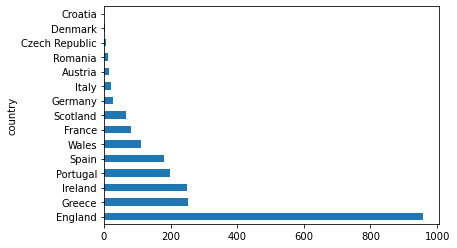

In [15]:
df1.groupby('country')['restaurant_name'].count().sort_values(ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='country'>

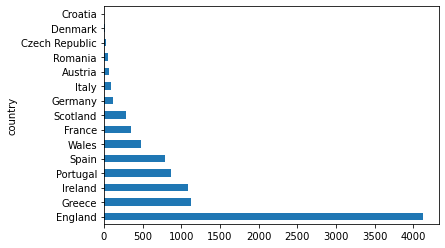

In [16]:
df1.groupby('country')['avg_rating'].sum().sort_values(ascending=False).plot(kind='barh')

### We can clearly see that the top country that appears on both charts is England

In [17]:
df2=df1[df1['country'] == 'England']

In [18]:
df2.shape

(957, 6)

In [19]:
df2

restaurant_name  country                  city  \
303                            Cafe Mylor  England      Mylor Churchtown   
304                  The Falcon At Hatton  England                Hatton   
305   Kipling's Restaurant Sowerby Bridge  England        Sowerby Bridge   
306                      The Willow House  England                Watton   
307                               Vesuvio  England               Worsley   
...                                   ...      ...                   ...   
1430                The Horns Country Inn  England            Churchtown   
1431                          Jacobs Well  England                Honley   
1432                     The Chequers Inn  England    Lytchett Matravers   
1433                          Monks Brook  England  Chandler\u2019s Ford   
1434                    The Cleveland Bay  England  Chandler\u2019s Ford   

       latitude  longitude  avg_rating  
303   50.177025  -5.053397         4.5  
304   52.308945  -1.661980         4.0  
305   53.708572  -1.911148         4.0  
306   52.571575   0.827447         4.5  
307   53.502710  -2.416235         4.5  
...         ...        ...         ...  
1430  53.880665  -2.787565         4.5  
1431  53.603320  -1.788306         4.5  
1432  50.759727  -2.085200         4.0  
1433  50.984753  -1.384664         4.0  
1434  50.978210  -1.402034         4.0  

[957 rows x 6 columns]

In [20]:
df2.reset_index(drop=True,inplace=True)

## Clustering

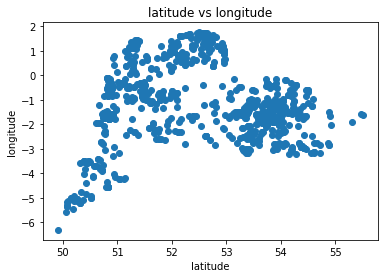

In [21]:
# Initial EDA to determine possible number of clusters in our data
plt.scatter(df2['latitude'],df2['longitude'])
plt.title('latitude vs longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [22]:
# Scale Data
# Save X data
scaler = StandardScaler()
dt=df2[['latitude','longitude','avg_rating']]
df_scaled = scaler.fit_transform(dt)
df_scaled

array([[-1.80296709, -2.50230735,  0.67768011],
       [-0.1873871 , -0.27058331, -1.07040579],
       [ 0.87325747, -0.43454847, -1.07040579],
       ...,
       [-1.3613925 , -0.54908349, -1.07040579],
       [-1.19086663, -0.08809535, -1.07040579],
       [-1.19582495, -0.09952569, -1.07040579]])

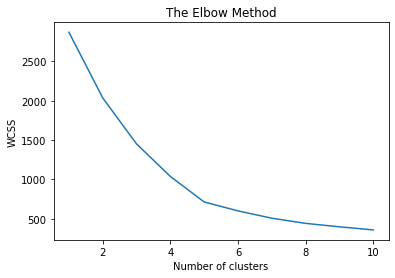

In [23]:
# Create Elbow Plot
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = [] 
# Iterate over different value of K to determine optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 123)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 5, random_state = 123)

y_kmeans = kmeans.fit_predict(df_scaled)

In [25]:
y_kmeans

array([3, 2, 2, 0, 1, 1, 2, 1, 4, 1, 3, 4, 0, 0, 1, 4, 3, 1, 1, 1, 2, 4,
       0, 0, 2, 4, 4, 0, 1, 4, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 4, 0, 0, 0,
       1, 3, 2, 0, 2, 1, 0, 4, 0, 2, 1, 4, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 1, 3, 0, 1, 0, 2, 1, 2, 4, 3, 0, 2, 1, 1, 1, 1, 0, 2, 4, 0, 2,
       0, 0, 4, 0, 1, 0, 4, 4, 2, 0, 2, 1, 2, 2, 3, 0, 4, 2, 0, 1, 1, 1,
       1, 0, 4, 2, 3, 3, 0, 2, 0, 3, 3, 1, 1, 0, 3, 3, 3, 0, 4, 0, 4, 2,
       1, 2, 1, 4, 4, 4, 4, 4, 0, 2, 4, 1, 0, 4, 1, 3, 0, 3, 0, 0, 2, 1,
       1, 1, 4, 0, 4, 4, 1, 1, 4, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4,
       0, 0, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 4, 3, 4, 4, 0, 4, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,

In [26]:
df2['label']=y_kmeans

<ipython-input-26-d6a1e0a93ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label']=y_kmeans


In [27]:
df2.sample(3)

restaurant_name  country         city   latitude  longitude  \
347       Aagrah - Midpoint  England     Bradford  53.799587  -1.704242   
905           The Haughmond  England  Upton Magna  52.707680  -2.658344   
21   Dolphin Inn Restaurant  England   Thorpeness  52.181744   1.614489   

     avg_rating  label  
347         3.5      2  
905         4.5      1  
21          4.0      4

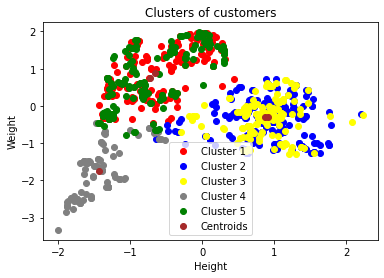

In [28]:
plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], c = 'yellow', label = 'Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], c = 'grey', label = 'Cluster 4')
plt.scatter(df_scaled[y_kmeans == 4, 0], df_scaled[y_kmeans == 4, 1], c = 'green', label = 'Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

<AxesSubplot:ylabel='label'>

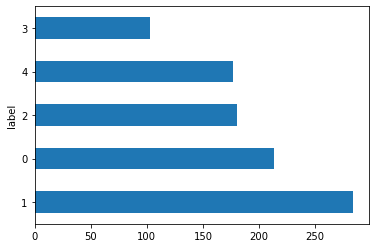

In [29]:
df2.groupby('label')['restaurant_name'].count().sort_values(ascending=False).plot(kind='barh')

In [30]:
dfc0=df2[df2['label']==0]
dfc1=df2[df2['label']==1]
dfc2=df2[df2['label']==2]
dfc3=df2[df2['label']==3]
dfc4=df2[df2['label']==4]

In [31]:
dfc0.groupby('city')['label'].count()

city
Adstock       1
Aldeburgh     2
Aldeby        1
Arundel       3
Ascot         1
             ..
Wolverton     1
Wood Green    1
Woodbridge    1
Worth         1
Wye           1
Name: label, Length: 153, dtype: int64

In [198]:
cityc1=dfc0.groupby('city')['label'].count().sort_values(ascending=False).index[0]
cityc2=dfc1.groupby('city')['label'].count().sort_values(ascending=False).index[0]
cityc3=dfc2.groupby('city')['label'].count().sort_values(ascending=False).index[0]
cityc4=dfc3.groupby('city')['label'].count().sort_values(ascending=False).index[0]
cityc5=dfc4.groupby('city')['label'].count().sort_values(ascending=False).index[0]
print('Most appeared city in each cluster respectively: {}, {}, {}, {}, {}'.format(cityc1,cityc2,cityc3,cityc4,cityc5))

Most appeared city in each cluster respectively: Brighton, York, Leeds, Torquay, Brighton


## Let's use Foursquare API to get data

In [37]:
CLIENT_ID = 'P5SMVDQTI1BLMAKDEXR3CUT4NWQIONYORTKO4J2XYH3PGKB4' # your Foursquare ID
CLIENT_SECRET = 'A0EZ0VNSYKGUZO3DFPKKPSL32ZJ4FBEZKWJGCUX3HTB13ZQT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
catid = '4d4b7105d754a06374d81259'
radius=250
query='restaurant'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P5SMVDQTI1BLMAKDEXR3CUT4NWQIONYORTKO4J2XYH3PGKB4
CLIENT_SECRET:A0EZ0VNSYKGUZO3DFPKKPSL32ZJ4FBEZKWJGCUX3HTB13ZQT


In [38]:
cities=[cityc1+', England',cityc2+', England',cityc3+', England',cityc4+', England',cityc5+', England']
cities

['Brighton, England',
 'York, England',
 'Leeds, England',
 'Torquay, England',
 'Brighton, England']

In [39]:
results=[]
for x in cities:
    address = x
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(x,latitude, longitude))
    url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude, VERSION,catid)
    result = requests.get(url).json()
    results.append(result)
    print(results)

The geograpical coordinate of Brighton, England are 50.8214626, -0.1400561.
[{'meta': {'code': 200, 'requestId': '6105d9f41f6a821709975ad3'}, 'response': {'venues': [{'id': '60f4699dbda9723afa803066', 'name': 'Tapas Revolution', 'location': {'address': '165 North Street', 'lat': 50.822334, 'lng': -0.139228, 'labeledLatLngs': [{'label': 'display', 'lat': 50.822334, 'lng': -0.139228}], 'distance': 113, 'postalCode': 'BN1 1EA', 'cc': 'GB', 'city': 'Brighton', 'state': 'East Sussex', 'country': 'United Kingdom', 'formattedAddress': ['165 North Street', 'Brighton', 'East Sussex', 'BN1 1EA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d150941735', 'name': 'Spanish Restaurant', 'pluralName': 'Spanish Restaurants', 'shortName': 'Spanish', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/spanish_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1627773428', 'hasPerk': False}, {'id': '60fff697b6a0e627c87dfe8b', 'name': 'Open Bakery', 'location': {'lat': 50.823

In [41]:
city1=results[0]['response']
city2=results[1]['response']
city3=results[2]['response']
city4=results[3]['response']
city5=results[4]['response']

In [161]:
city1['venues'][5]

{'id': '60f40b98e6d5b93439f2147b',
 'name': "Fry's American Bbq",
 'location': {'lat': 50.80336,
  'lng': 0.30471236,
  'labeledLatLngs': [{'label': 'display', 'lat': 50.80336, 'lng': 0.30471236}],
  'distance': 31348,
  'postalCode': 'BN23 7RT',
  'cc': 'GB',
  'country': 'United Kingdom',
  'formattedAddress': ['BN23 7RT', 'United Kingdom']},
 'categories': [{'id': '4bf58dd8d48988d14e941735',
   'name': 'American Restaurant',
   'pluralName': 'American Restaurants',
   'shortName': 'American',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1627773428',
 'hasPerk': False}

In [170]:
Brighton=pd.DataFrame(city1['venues'])

lng=[]
lat=[]
city=[]
category=[]

for data_item in Brighton['location'].tolist():
    lng.append(data_item['lng'])
    lat.append(data_item['lat'])
    
for x in range(len(Brighton['categories'])):
    for data_item in Brighton['categories'][x]:
        category.append(data_item['name'])
        
Brighton['category']=category
city=['Brighton' for x in range(len(Brighton['categories']))]
Brighton['city']=city
Brighton['lng']=lng
Brighton['lat']=lat


York=pd.DataFrame(city2['venues'])

lng=[]
lat=[]
city=[]
category=[]

for data_item in York['location'].tolist():
    lng.append(data_item['lng'])
    lat.append(data_item['lat'])
    
for x in range(len(York['categories'])):
    for data_item in York['categories'][x]:
        category.append(data_item['name'])
        
York['category']=category
city=['York' for x in range(len(York['categories']))]
York['city']=city
York['lng']=lng
York['lat']=lat


Leads=pd.DataFrame(city3['venues'])


lng=[]
lat=[]
city=[]
category=[]

for data_item in Leads['location'].tolist():
    lng.append(data_item['lng'])
    lat.append(data_item['lat'])

for x in range(len(Leads['categories'])):
    for data_item in Leads['categories'][x]:
        category.append(data_item['name'])
        
Leads['category']=category
city=['Leads' for x in range(len(Leads['categories']))]
Leads['city']=city
Leads['lng']=lng
Leads['lat']=lat


Torquay=pd.DataFrame(city4['venues'])
Torquay

lng=[]
lat=[]
city=[]
category=[]

for data_item in Torquay['location'].tolist():
    lng.append(data_item['lng'])
    lat.append(data_item['lat'])

for x in range(len(Torquay['categories'])):
    for data_item in Torquay['categories'][x]:
        category.append(data_item['name'])
        
Torquay['category']=category
city=['Torquay' for x in range(len(Torquay['categories']))]
Torquay['city']=city
Torquay['lng']=lng
Torquay['lat']=lat

#We're gonna ignore the final city since it is doplicated. 
dflist=[Brighton,York,Leads,Torquay]
df=pd.concat(dflist,ignore_index=True)

In [171]:
df.sample(5)

id                                           name  \
48   4e03890d227144bc81cf4b06  Stamford House Chinese Take Away & Restaurant   
57   4bb0a35af964a52037513ce3                          Bettys Café Tea Rooms   
115  4c210feb8082d13a02aff82a                                     Pier Point   
72   5d5809a73abe8f0008a09599                                        Luigi's   
56   4c01028ccf3aa5931a4fccb0                             Fodder Shop & Cafe   

                                              location  \
48   {'address': '5 The Square', 'crossStreet': 'St...   
57   {'address': '1 Parliament St', 'lat': 53.99269...   
115  {'address': 'Torquay', 'lat': 50.4615285618301...   
72   {'address': 'Longwood Gate', 'lat': 53.650166,...   
56   {'address': 'Railway Rd', 'crossStreet': 'Grea...   

                                            categories    referralId  hasPerk  \
48   [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1627773429    False   
57   [{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...  v-1627773429    False   
115  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...  v-1627773432    False   
72   [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...  v-1627773431    False   
56   [{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...  v-1627773429    False   

    venuePage            category     city       lng        lat  
48        NaN  Chinese Restaurant     York -0.914247  53.991129  
57        NaN            Tea Room     York -1.542601  53.992692  
115       NaN          Restaurant  Torquay -3.530763  50.461529  
72        NaN         Pizza Place    Leads -1.842479  53.650166  
56        NaN      Farmers Market     York -1.499975  53.983068

In [173]:
# Delete unnecesarry columns
df.drop(['id','location','categories','referralId','hasPerk','venuePage'],axis=1, inplace=True)
df

name                   category      city       lng  \
0         Tapas Revolution         Spanish Restaurant  Brighton -0.139228   
1              Open Bakery                     Bakery  Brighton -0.128115   
2        Really Good Juice                  Juice Bar  Brighton -0.158072   
3              OHSO Social                       Café  Brighton -0.139165   
4                  Zaitoon  Middle Eastern Restaurant  Brighton -0.143440   
..                     ...                        ...       ...       ...   
114    The Mill On The Exe                        Pub   Torquay -3.539348   
115             Pier Point                 Restaurant   Torquay -3.530763   
116  Wellies Of Sells wood    Comfort Food Restaurant   Torquay -3.505276   
117          The Crab Shed         Seafood Restaurant   Torquay -3.767366   
118      Grow Coffee House                Coffee Shop   Torquay -3.530923   

           lat  
0    50.822334  
1    50.823605  
2    50.825647  
3    50.819104  
4    50.822870  
..         ...  
114  50.722025  
115  50.461529  
116  50.467327  
117  50.240920  
118  50.720812  

[119 rows x 5 columns]

In [174]:
address = 'United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of United Kingdom are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of United Kingdom are 54.7023545, -3.2765753.


In [179]:
map_euro2 = folium.Map(location=[latitude, longitude])

# add markers to map
for lat, lng, name, city, category in zip(df['lat'], df['lng'], df['name'], df['city'], df['category']):
    label = '{}, \n{},\n{} '.format(city,name, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_euro2)  
    
map_euro2
#Please Minimize the map to see the dots

In [187]:
df.loc[df['city'] == 'Brighton', df.columns[1]].value_counts().index[0]

'Coffee Shop'

In [189]:
df.loc[df['city'] == 'York', df.columns[1]].value_counts().index[0]

'Coffee Shop'

In [192]:
df.loc[df['city'] == 'Leads', df.columns[1]].value_counts().index[0]

'Coffee Shop'

In [195]:
df.loc[df['city'] == 'Torquay', df.columns[1]].value_counts().index[0]

'Coffee Shop'

# Cunclusion

In Cunclusion, te country that has the highest number of restaurant is England. The top cities in Englas are Brighton, York, Leads and Torquay. Interestingly, the most appeared category is the Coffee Shop. So the investment company will focus on coffee shops.